## Find KO cutoff size
This notebook runs a "saturation analysis" to see how number of KO detected is impacted by KO cutoff size.

In [1]:
import os
from Bio import SeqIO
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
os.chdir('/Users/cwagner2/Work/projects/covid/long-deletions/')

In [3]:
## Matplot lib settings
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['axes.linewidth'] = 1.2
mpl.rcParams['font.sans-serif'] = 'Helvetica'
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['xtick.major.width'] = 1.2
mpl.rcParams['ytick.major.width'] = 1.2
mpl.rcParams['figure.titleweight'] = 'bold'
mpl.rcParams['figure.titlesize']= 14
mpl.rcParams['legend.fontsize']=12
mpl.rcParams['legend.title_fontsize']=14

In [4]:
with open('results/gisaid.washington_ko_meta.tsv','r') as f:
    data = pd.read_csv(f,sep='\t')

/var/folders/b5/2grxct1x69395r8j6vkk07bc0000gp/T/ipykernel_55559/4184021818.py:2: DtypeWarning: Columns (50,60,152,178) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(f,sep='\t')


In [5]:
## Get reference protien lengths
ref = SeqIO.read('sars2_ref.gb','gb')

proteins = {}
for feature in ref.features:
    if feature.type == "CDS":
        start = feature.location.start
        end = feature.location.end
        name = feature.qualifiers['gene'][0]
        refgene = ref.seq[start:end]
        refprotein = refgene.translate(to_stop=True)
        refplength = len(refprotein)
        proteins[name] = refplength

In [13]:
def generate_cutoffs(df,pdict):
    cutoffs = []
    n_ko = []
    genes = []

    for aa in range(1,250):
        bp = aa*3
        for gene in pdict.keys():
            kos = len(df[((df[gene+'_maxDeletion']>=bp)|((pdict[gene] - df[gene+'_proteinLength'])>= aa)) & (df.coverage>=0.95)])
            cutoffs.append(aa)
            n_ko.append(kos)
            genes.append(gene)

    cutoff_df = pd.DataFrame({'ko_cutoff':cutoffs,'n_ko':n_ko,'gene':genes})
    return cutoff_df

In [14]:
cutoffs = generate_cutoffs(data,proteins)

In [8]:
def plot_cutoffs(df,pdict,cutoff,path=None):
    plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.tab20.colors)
    fig, ax = plt.subplots(tight_layout=True)
    for gene in pdict.keys():
        filt = df[df.gene==gene]
        ax.plot(filt.ko_cutoff,filt.n_ko,label=gene)
    ax.set_xlabel('KO cutoff length (aa)')
    ax.set_ylabel('Number of KOs')
    ax.legend()
    ax.axvline(x=cutoff,ls='dashed',c='k')
    ax.text(cutoff + 2 ,max(df.n_ko),'cutoff = ' + str(cutoff))
    if path:
        fig.savefig(path,bbox_inches='tight',dpi=300)

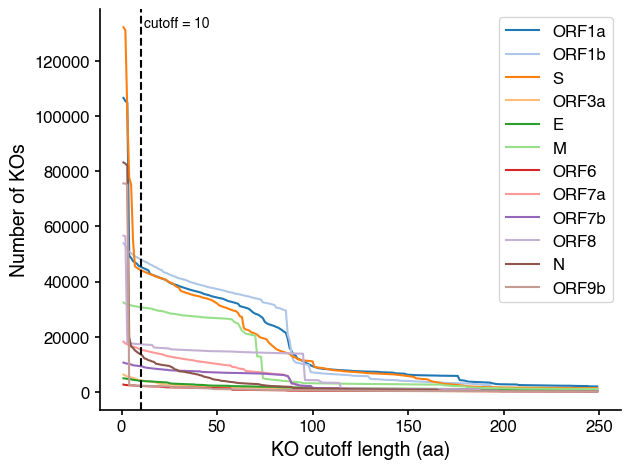

In [9]:
plot_cutoffs(cutoffs,proteins,10,'figs/supplemental/kos_cutoff.pdf')

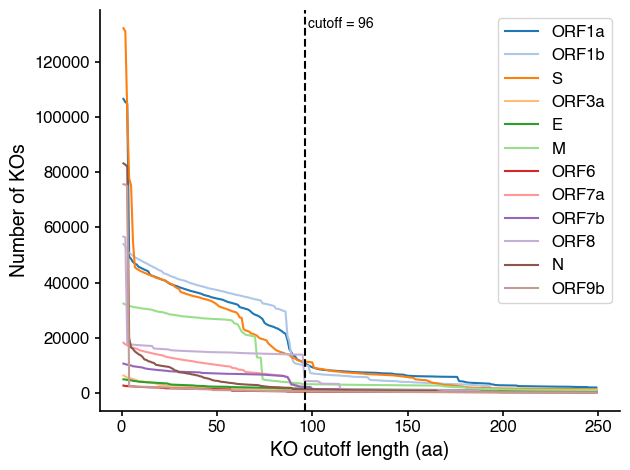

In [10]:
plot_cutoffs(cutoffs,proteins,96)

In [15]:
len(data[data.coverage>=0.95])

128004

In [16]:
orf8 = cutoffs[cutoffs.gene=='ORF8']
orf8['percent_KO']= orf8['n_ko']/len(data[data.coverage>=0.95])
with pd.option_context('display.max_rows', len(orf8)):
    display(orf8)

/var/folders/b5/2grxct1x69395r8j6vkk07bc0000gp/T/ipykernel_55559/3350878117.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orf8['percent_KO']= orf8['n_ko']/len(data[data.coverage>=0.95])


,ko_cutoff,n_ko,gene,percent_KO
9,1,51142,ORF8,0.399534
21,2,50981,ORF8,0.398277
33,3,15350,ORF8,0.119918
45,4,15256,ORF8,0.119184
57,5,15144,ORF8,0.118309
69,6,15090,ORF8,0.117887
81,7,15031,ORF8,0.117426
93,8,14986,ORF8,0.117074
105,9,14963,ORF8,0.116895
117,10,14929,ORF8,0.116629
